In [1]:
import pandas as pd

In [2]:
results_en = pd.read_json("data_trial_en.scores.json")
results_sv = pd.read_json("data_trial_sv.scores.json")

In [3]:
results_en.drop("emb-manhattan", inplace=True)
results_en.drop("emb-euclidean", inplace=True)

results_sv.drop("emb-manhattan", inplace=True)
results_sv.drop("emb-euclidean", inplace=True)



English trial set


<Axes: >

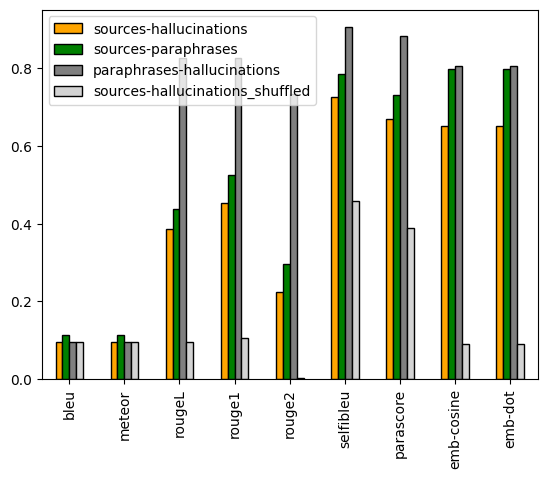

In [4]:
color = ["orange", "green", "gray", "lightgray"]
print("English trial set")
results_en.plot(kind="bar", color=color, edgecolor="black") 

Swedish trial set


<Axes: >

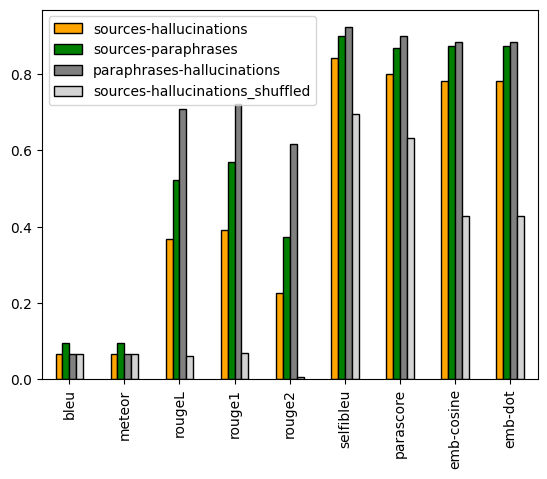

In [5]:
color = ["orange", "green", "gray", "lightgray"]
print("Swedish trial set")
results_sv.plot(kind="bar", color=color, edgecolor="black") 

In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

device = torch.device("cuda:0")
model_name = "MoritzLaurer/DeBERTa-v3-base-mnli-fever-docnli-ling-2c"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)
premise = "I first thought that I liked the movie, but upon second thought it was actually disappointing."
hypothesis = "The movie was good."
input = tokenizer(premise, hypothesis, truncation=True, return_tensors="pt")
output = model(input["input_ids"].to(device))
prediction = torch.softmax(output["logits"][0], -1).tolist()
label_names = ["entailment", "not_entailment"]
#prediction = {
#    name: round(float(pred) * 100, 1) for pred, name in zip(prediction, label_names)
#}

In [14]:
prediction

[0.032301489263772964, 0.9676985144615173]